In [2]:
import keras

Using Theano backend.


## One Neuron, Single Example

Purely for comparison we are going to reimplement the single neuron, single input in keras

In [3]:
import numpy
def simpleModel():
    import keras #Ugly simple imports
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(1,
                input_shape=(3,))) #Single layer, single neuron
    model.add(keras.layers.Activation('relu')) # Linear
    
    
    from keras.optimizers import SGD #nicer imports
    sgd = SGD(lr=0.01, decay=.2, momentum=0.9, nesterov=True)
    #Some things to try
    # objective 'mean_absolute_error'
    # optimizers /'adam'/'nadam'/'adadelta'/'adagrad'
    model.compile(loss='mean_squared_error', optimizer=sgd) 
    
    return model

import numpy as np
#Initializing Model
#Stocastic Gradient Descent #code is clear if you import like this
model1 = simpleModel()
model1.set_weights(np.array([np.array([[50],[50],[50]]),np.array([0])]))#Weights are already initialized


#Fitting Model
import numpy as np
inputs =np.array([[2,5,3]])
target = np.array([[850]])
output = []
weights = []
for i in range(40):
    weights.append(model1.get_weights()[0])
    model1.fit(inputs,target,batch_size=1, nb_epoch=1,verbose=0.)
    output.append(model1.predict(inputs)[0][0])
    

#Plotting Model
import matplotlib.pyplot as plt
w = np.concatenate(np.array(weights),axis=-1)
plt.plot(w[0],'ob', label = '$w_0$')
plt.plot(w[1],'sr', label = '$w_1$')
plt.plot(w[2],'vg', label = '$w_2$')
plt.legend(bbox_to_anchor=(1.0, 1), loc=0, borderaxespad=0.)
plt.title(' Keras weights changes')
plt.show()

Converges more quickily??? -> unexpected

appears to be taking three steps?

Keras is converging too quickily cheater...

## Cooler Things

Almost right away we can do more interesting things

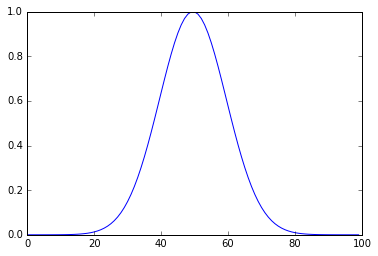

(10000, 100)

In [5]:
from scipy.signal import gaussian

plt.plot(gaussian(100,10))
plt.show()
sig = 10*np.random.rand(10000)
gaus = np.array([gaussian(100,i) for i in sig])
gaus.shape

In [6]:
import numpy
def gaussModel():
    import keras #Ugly simple imports
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(1,
                input_shape=(100,))) #Single layer, single neuron
    #model.add(keras.layers.Activation('relu')) # Linear
    #model.add(keras.layers.Dense(30))
    #model.add(keras.layers.Activation('relu')) 
    #model.add(keras.layers.Dense(1))
    #model.add(keras.layers.Activation('relu')) 
    
    
    from keras.optimizers import SGD #nicer imports
    sgd = SGD(lr=0.01, decay=.0000, momentum=0.95, nesterov=True)
    #Some things to try
    # objective 'mean_absolute_error'
    # optimizers /'adam'/'nadam'/'adadelta'/'adagrad'
    model.compile(loss='mean_squared_error', optimizer='nadam') 
    
    return model

model1 = gaussModel()

#Fitting Model
import numpy as np
inputs = gaus
target = sig
output = []
weights = []
for i in range(2):
    weights.append(model1.get_weights()[0])
    model1.fit(inputs,target,batch_size=1, nb_epoch=1)

Epoch 1/1
10000/10000 [==============================] - 8s - loss: 0.5016     
Epoch 1/1
10000/10000 [==============================] - 9s - loss: 1.4194e-04     


This can be converted into a resolution curve.

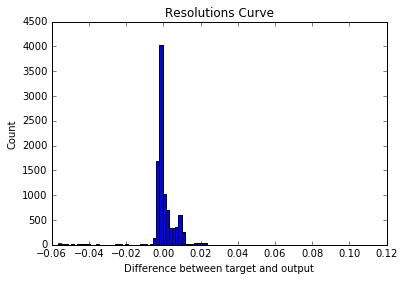

In [7]:
output = model1.predict(gaus)
plt.hist(np.concatenate(output)-sig,bins=100)
plt.title('Resolutions Curve')
plt.ylabel('Count') #Should integrate to 10000 points
plt.xlabel('Difference between target and output')
plt.show()

One thing to expect is this result could be bias or over fitted let's try new results

In [8]:
sig

array([ 6.91850426,  6.71813454,  0.15854105, ...,  8.31286109,
        2.57802704,  5.79694019])

In [10]:
model1.summary()
m = model1.to_json()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_2 (Dense)                  (None, 1)             101         dense_input_2[0][0]              
Total params: 101
____________________________________________________________________________________________________


In [12]:
type(m)

str

# Teaching a neural network to do a Coordinate Transform

In [20]:
import numpy as np
x = np.random.rand(10000,3)
#Transforming this set of vectors into spherical coordinates

#Note : x = x[:,0]; y = x[:,1]; z = x[:,2]
#Is this non-obvious?
rad,theta,phi = np.array([np.sqrt(np.sum(np.square(x),axis=-1)),np.arctan(np.sqrt(np.square(x[:,1])+np.square(x[:,0]))/x[:,2]),np.arctan(x[:,1]/x[:,0])])

#So many ways to write things!
out = np.array([[rad[i],theta[i],phi[i]]for i in range(rad.size)])


In [22]:
print(out.shape)
print(x.shape)

(10000, 3)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_62 (Dense)                 (None, 3)             12          dense_input_21[0][0]             
____________________________________________________________________________________________________
activation_60 (Activation)       (None, 3)             0           dense_62[0][0]                   
____________________________________________________________________________________________________
dense_63 (Dense)                 (None, 100)           400         activation_60[0][0]              
____________________________________________________________________________________________________
activation_61 (Activation)       (None, 100)           0           dense_63[0][0]                   
___________________________________________________________________________________________

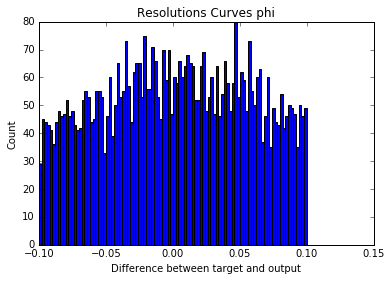

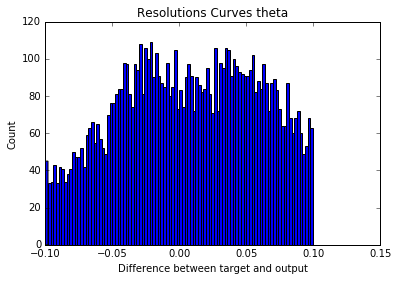

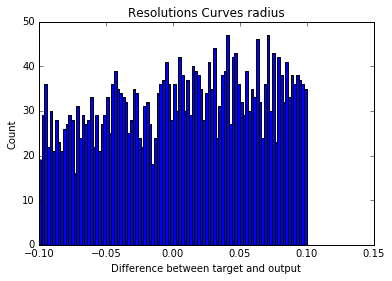

Epoch 1/1
10000/10000 [==============================] - 0s - loss: 0.0221     


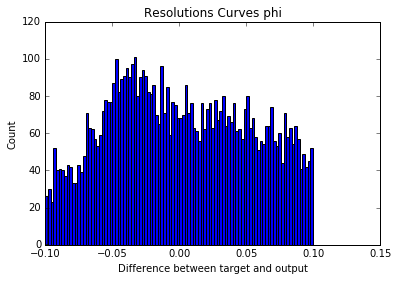

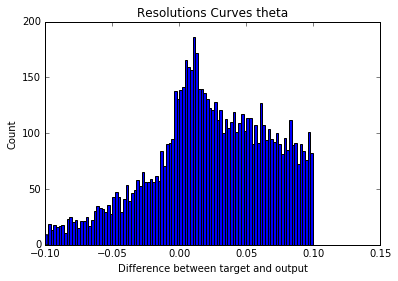

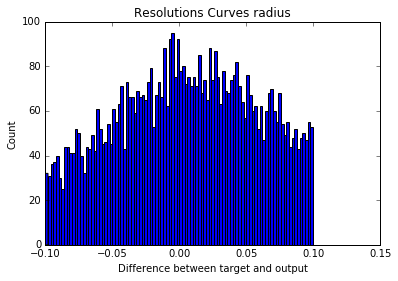

Epoch 1/1
10000/10000 [==============================] - 0s - loss: 0.0117     


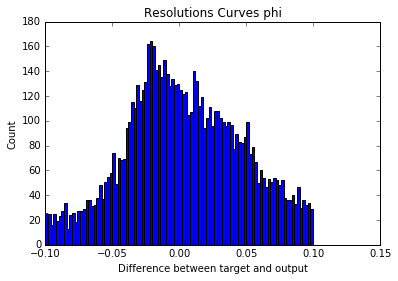

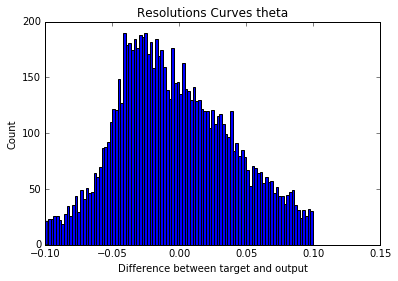

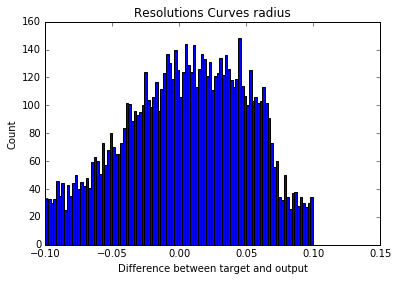

Epoch 1/1
10000/10000 [==============================] - 0s - loss: 0.0071     


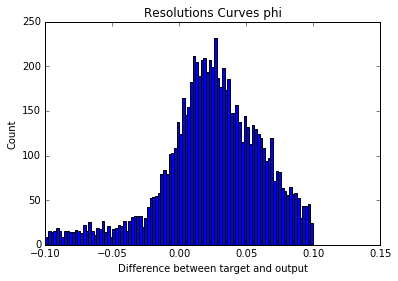

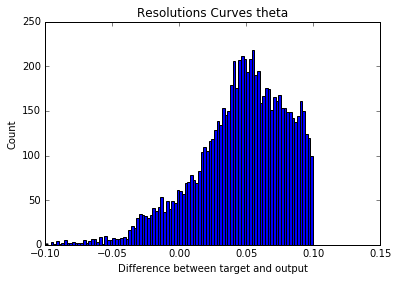

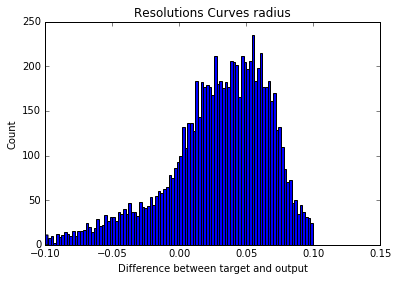

Epoch 1/1
10000/10000 [==============================] - 0s - loss: 0.0051     


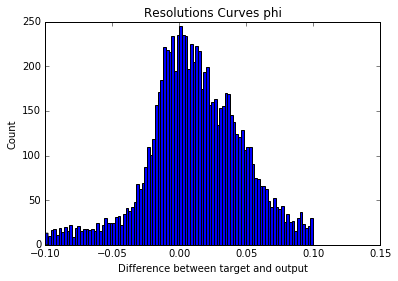

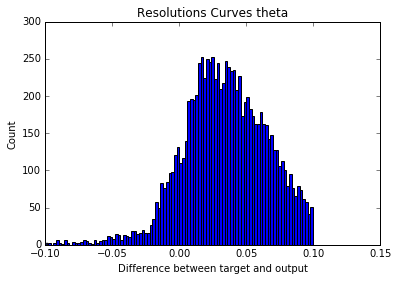

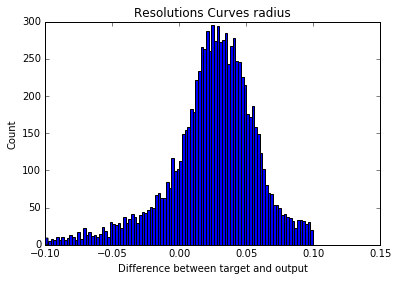

In [50]:
def coordModel():
    from keras.models import Sequential #Ugly simple imports
    from keras.layers import Dense, Activation
    model = Sequential()
    model.add(Dense(3,
                input_shape=(3,))) #Single layer, single neuron
    model.add(Activation('relu')) # Linear
    model.add(Dense(100))
    model.add(Activation('relu')) 
    model.add(Dense(100))
    model.add(Activation('relu')) 
    model.add(Dense(3))
    model.add(Activation('linear')) 
    model.layers.pop()
    model.layers.pop()
    model.add(Dense(3))
    model.add(Activation('linear')) 
    print(model.summary())
    
    from keras.optimizers import SGD #nicer imports
    sgd = SGD(lr=0.01, decay=.0000, momentum=0.95, nesterov=True)
    #Some things to try
    # objective 'mean_absolute_error'
    # optimizers /'adam'/'nadam'/'adadelta'/'adagrad'
    model.compile(loss='mean_squared_error', optimizer='nadam') 
    
    return model

model1 = coordModel()

#Fitting Model
import numpy as np
inputs = x
target = out
output = []
weights = []
for i in range(5):
    weights.append(model1.get_weights()[0])
    model1.fit(inputs,target,batch_size=100, nb_epoch=1)
    
    import matplotlib.pyplot as plt
    prediction = model1.predict(x)
    plt.hist((prediction-target)[:,2],bins=100,range=(-.1,.1))
    plt.title('Resolutions Curves phi')
    plt.ylabel('Count') #Should integrate to 10000 points
    plt.xlabel('Difference between target and output')
    plt.show()

    plt.hist((prediction-target)[:,1],bins=100,range=(-.1,.1))
    plt.title('Resolutions Curves theta')
    plt.ylabel('Count') #Should integrate to 10000 points
    plt.xlabel('Difference between target and output')
    plt.show()
    plt.hist((prediction-target)[:,0],bins=100,range=(-.1,.1))
    plt.title('Resolutions Curves radius')
    plt.ylabel('Count') #Should integrate to 10000 points
    plt.xlabel('Difference between target and output')
    plt.show()
    
    #weights = []

In [41]:
model1.predict(np.array([[0.1,0.1,0.1]]))

array([[ 0.17201963,  0.97428972,  0.78417689]], dtype=float32)